<a href="https://colab.research.google.com/github/Carlys222/UNIDAD-1/blob/main/PROYECTO_BASE_DE_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

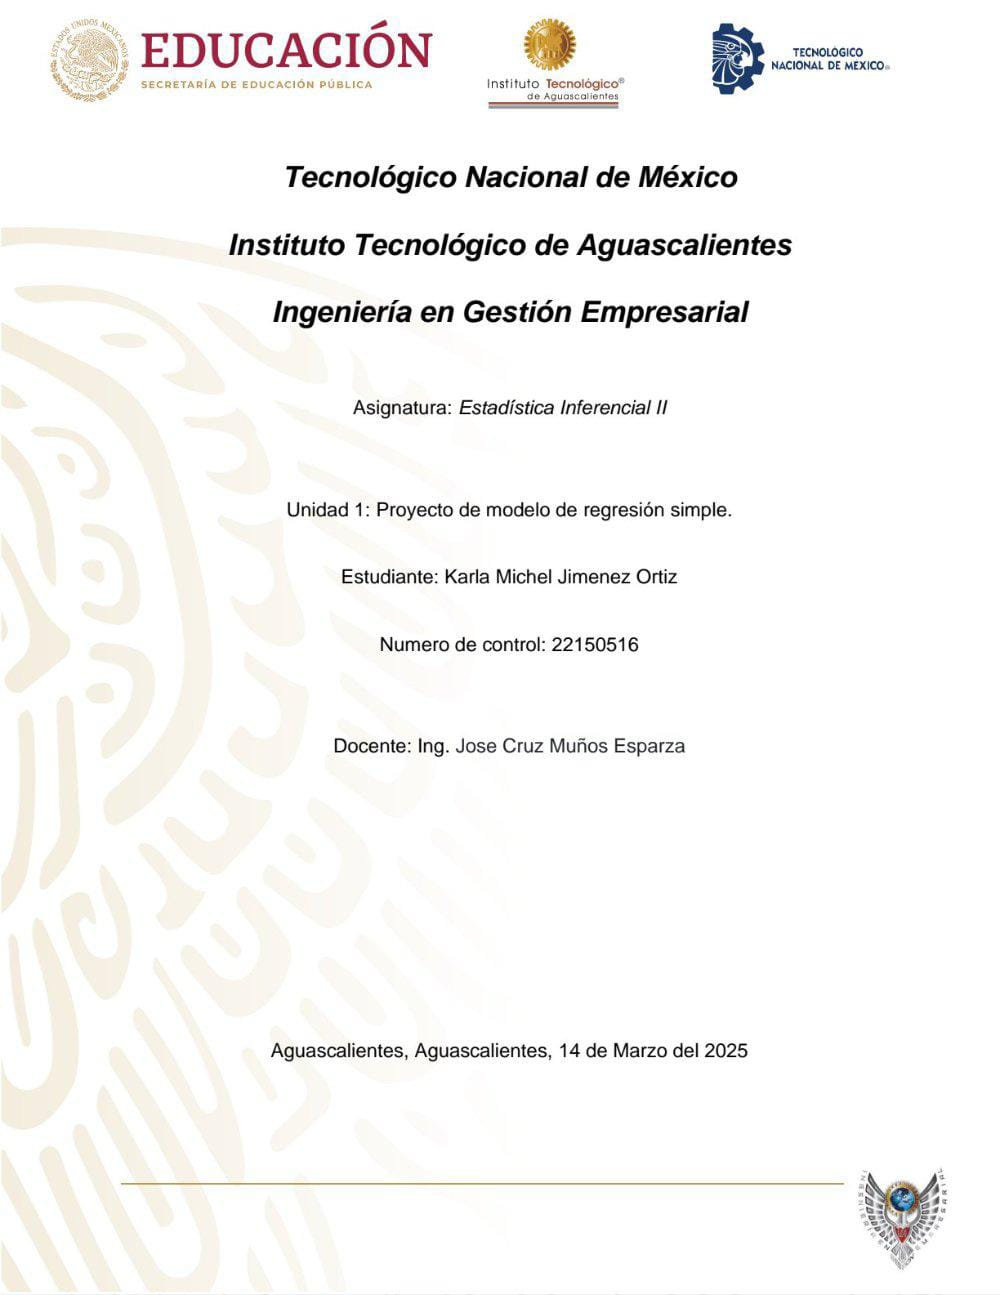

## Introducción

Dentro del presente estudio se busca determinar la relación existente entre los años de experiencia laboral y el salario percibido por los empleados. Este análisis es fundamental para entender la evolución de los ingresos a lo largo de la vida profesional y cómo las empresas establecen las compensaciones económicas en función del tiempo trabajado. A través de un modelo de regresión lineal simple, se examinará esta relación mediante un conjunto de datos que recoge información sobre distintas personas con diferentes niveles de experiencia.
El estudio tiene aplicaciones en el ámbito de recursos humanos, pues permite a las organizaciones diseñar estructuras salariales más equitativas y predecibles. Además, proporciona una herramienta útil para empleados que desean conocer cómo su experiencia impacta en su remuneración futura.


# Marco Teórico

La regresión lineal, una técnica estadística ampliamente utilizada en la economía y la administración de empresas. La regresión lineal permite identificar patrones y tendencias en los datos, proporcionando una ecuación matemática que describe cómo una variable depende de otra.

En este caso, el salario es la variable dependiente, ya que se espera que varíe en función de los años de experiencia, que es la variable independiente. La relación entre ambas se modela mediante la ecuación:

Y=b0+b1*X+e

donde:

 Y representa el salario de un empleado,

b0  es el salario estimado cuando la experiencia es igual a cero,

b1  indica cuánto aumenta el salario por cada año adicional de experiencia,

X  son los años de experiencia,

e es un término de error que recoge factores no considerados en el modelo.

Para evaluar qué tan fuerte es la relación entre estas variables, se utilizan dos indicadores principales:
Coeficiente de correlación (r): mide la dirección y la fuerza de la relación entre experiencia y salario. Valores cercanos a +1 indican una relación positiva fuerte, mientras que valores cercanos a 0 sugieren poca o ninguna relación.

Coeficiente de determinación (R²): indica el porcentaje de la variabilidad en los salarios que puede explicarse por los años de experiencia. Valores altos de R² sugieren que el modelo de regresión es adecuado para hacer predicciones.

Además, es importante considerar los supuestos de la regresión lineal, entre ellos:

Linealidad: La relación entre las variables debe ser aproximadamente lineal.
Independencia: Las observaciones deben ser independientes entre sí.
Homocedasticidad: La variabilidad de los errores debe ser constante a lo largo de los valores de la variable independiente.
Normalidad de los residuos: Los errores deben distribuirse de manera normal.

Si estos supuestos se cumplen, se puede concluir con confianza que la experiencia laboral tiene un impacto significativo en el salario, lo que permite a empresas y empleados tomar decisiones informadas sobre compensaciones y expectativas salariales.

# Hipótesis

Para realizar este análisis, se plantean las siguientes hipótesis:
Hipótesis Nula (H0): No existe una relación significativa entre los años de experiencia y el salario.

Hipótesis Alternativa (H1): Existe una relación significativa entre los años de experiencia y el salario.

Si la evidencia empírica respalda la hipótesis alternativa, se podrá afirmar que la experiencia laboral influye en la remuneración de los empleados.

# Metodología

El análisis se realizó utilizando un conjunto de datos que contiene información sobre el salario y la experiencia laboral de varios empleados. La metodología seguida fue la siguiente:

Limpieza y preprocesamiento de datos: Se eliminaron valores nulos, inconsistentes o atípicos para garantizar la calidad del análisis.
Exploración de datos: Se generaron estadísticas descriptivas de las variables para identificar su distribución y comportamiento.
Regresión lineal: Se ajustó un modelo de regresión lineal simple para estimar la relación entre los años de experiencia y el salario.
Validación del modelo: Se realizaron pruebas estadísticas para evaluar la normalidad de los residuos, la homocedasticidad y la significancia del modelo.


# Resultados e Interpretación de Gráficas

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Carlys222/UNIDAD-1/refs/heads/main/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Coeficiente de correlacion:  0.9782

Coeficiente de determinacion:  0.9570

intervalo de confianza de b1 de  5%
 9425.9980 < b1 <  9473.9266
            df      sum_sq     mean_sq           F        PR(>F)
Salary     1.0  223.501695  223.501695  622.507203  1.143068e-20
Residual  28.0   10.052972    0.359035         NaN           NaN
 valor_p Test de shapiro:  0.1952

Valor_p de Breusch-Pagan:  0.5276



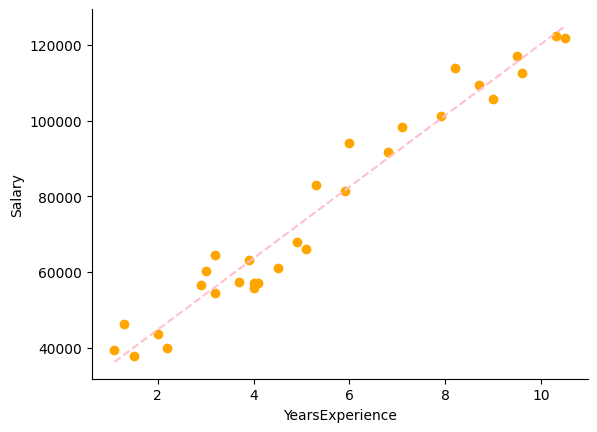

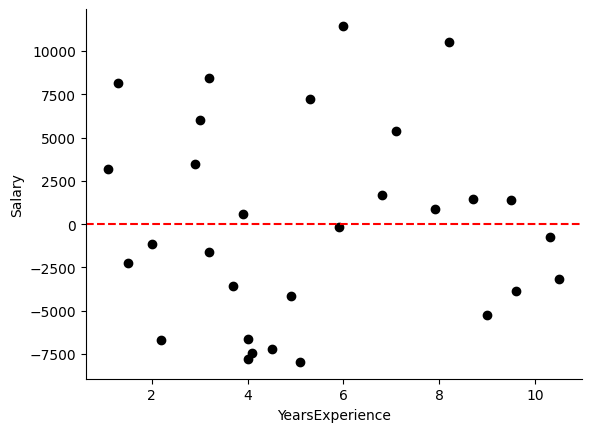

In [2]:
# Establecer una variable dependiente (Y) y una variable independiente (X).

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Carlys222/UNIDAD-1/refs/heads/main/Salary_Data.csv')
df.dropna(inplace=True)
X = df['YearsExperience'] # Variable independiente
Y = df['Salary'] # Variable dependiente

# Grafico de dispercion y recta de regresion ajustada
import matplotlib.pyplot as plt
plt.figure()
plt.scatter (X, Y, color = 'Orange')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Recta de regresion lineal
import statsmodels.api as sm
X_constante = sm.add_constant(X)
modelo = sm.OLS(Y, X_constante).fit()

b0, b1 = modelo.params

Fun = lambda X: b0 + b1 * X

Yc = Fun(X)

plt.plot(X, Yc, color = 'pink', linestyle = '--')

# Calcula el coeficiente de correlación y el coeficiente de determinación e interpreta los resultados.
from scipy.stats import pearsonr
r,_ = pearsonr(X,Y)
print(f'Coeficiente de correlacion: {r: 0.4f}\n')

print(f'Coeficiente de determinacion: {r ** 2: 0.4f}\n')
# Obtén un intervalo de confianza de 95% para la pendiente e interpreta el resultado. Respalda tu conclusión usando ANOVA.
nivel_de_confianza = 0.05
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'intervalo de confianza de b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}')

# Tabla ANOVA
from statsmodels.formula.api import ols
# Y ~ X
modelo_2 = ols('YearsExperience ~ Salary', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_2)
print(tabla_anova)

# Verifica los supuestos.
residuales = modelo.resid
plt.figure()
plt.scatter(X, residuales, color = 'black')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y = 0, color = 'red', linestyle = '--')

from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f' valor_p Test de shapiro: {valor_p_sh: 0.4f}\n')

from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, X_constante)
print(f'Valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')


Los resultados obtenidos fueron los siguientes:
Coeficiente de correlación (r): 0.9782, lo que indica una relación positiva fuerte entre los años de experiencia y el salario.

Coeficiente de determinación (R²): 0.9570, lo que significa que el 95.7% de la variabilidad en los salarios es explicada por los años de experiencia.

Intervalo de confianza para b1: [9425.9980, 9473.9266], lo que indica que cada año de experiencia aumenta el salario en aproximadamente 9,450 unidades monetarias.

Prueba de Shapiro-Wilk: Valor, lo que indica que los residuos siguen una distribución normal y se cumple el supuesto de normalidad.

Prueba de Breusch-Pagan: Valor, lo que indica que no hay heterocedasticidad significativa en el modelo.

La gráfica de dispersión de datos muestra una tendencia positiva clara, en la cual se observa que, a mayor experiencia laboral, mayor es el salario percibido. La línea de regresión ajustada sigue de cerca los puntos de datos, lo que sugiere que el modelo captura adecuadamente la relación entre ambas variables.

Además, el análisis de los residuos revela que estos no presentan patrones sistemáticos, confirmando que el modelo cumple con los supuestos de homocedasticidad y normalidad.


# Conclusión

Los resultados del estudio confirman que existe una relación significativa y positiva entre los años de experiencia y el salario, lo que respalda la hipótesis alternativa. En términos prácticos, esto implica que el crecimiento salarial de los empleados está fuertemente influenciado por su nivel de experiencia laboral.

Dado que el modelo cumple con los supuestos estadísticos necesarios, se puede utilizar para realizar predicciones salariales con un alto grado de confianza. Esto es de gran utilidad tanto para empleadores que desean establecer políticas de compensación equitativas, como para empleados que buscan entender el impacto de su experiencia en sus ingresos futuros.

En conclusión, este análisis proporciona evidencia sólida de que la experiencia laboral es un factor determinante en la remuneración de los trabajadores y que su influencia puede ser cuantificada de manera efectiva mediante un modelo de regresión lineal simple
